In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Train Dataframes
## IMR
### Data loading

In [2]:
route1 = r'..\data\TRAIN_NEW\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv'
train_FCM = pd.read_csv(route1)
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [3]:
train_FCM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [4]:
train_FCM.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.185265,0.583053,0.439351,0.450398,0.584654,0.554164,0.508957,0.282565,0.426095,0.254628,...,0.044413,-0.079307,-0.037423,0.009393,0.557159,0.376624,0.370711,0.500415,0.476418,0.543181
std,0.238481,0.172632,0.235019,0.212111,0.195918,0.157533,0.179127,0.189683,0.202979,0.208395,...,0.191253,0.204061,0.205052,0.198820,0.150605,0.197995,0.191249,0.177047,0.177732,0.170237
min,-0.657053,-0.224815,-0.517318,-0.440235,-0.486239,-0.059139,-0.181009,-0.341516,-0.353362,-0.578757,...,-0.547155,-0.620350,-0.584162,-0.605647,-0.052284,-0.359869,-0.553067,-0.302408,-0.307228,-0.224057
25%,0.028235,0.495514,0.286137,0.314428,0.486735,0.462448,0.406548,0.152607,0.319183,0.124448,...,-0.087566,-0.220508,-0.187871,-0.124404,0.469147,0.262601,0.242569,0.389078,0.367971,0.442283
50%,0.192886,0.606585,0.469826,0.479330,0.623346,0.577187,0.534237,0.290552,0.452538,0.268802,...,0.043204,-0.093695,-0.044155,0.004375,0.573840,0.391739,0.388528,0.524508,0.496103,0.566455
75%,0.358902,0.710758,0.626871,0.604438,0.726116,0.670072,0.636448,0.423821,0.570470,0.402742,...,0.177608,0.049707,0.104526,0.146865,0.666128,0.521904,0.505970,0.630443,0.600065,0.667402
max,0.824448,0.907209,0.884576,0.876987,0.893974,0.882400,0.892983,0.803253,0.854104,0.828335,...,0.670512,0.596618,0.630932,0.666169,0.889148,0.866371,0.828784,0.914021,0.898459,0.903364


In [5]:
# order participant_id

train_FCM.sort_values(by='participant_id', inplace=True)

## Categorical
### Data loading

In [6]:
route2 = r'..\data\TRAIN_NEW\TRAIN_CATEGORICAL_METADATA_new.xlsx'
train_cat = pd.read_excel(route2)
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [7]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [8]:
train_cat.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1170.000000,1159.000000,1210.000000,1198.000000,1182.000000,1015.000000,991.000000
mean,2017.652102,2.014839,0.435897,2.177739,2.294215,17.862270,25.545685,16.876847,30.257316
std,1.122522,1.135147,0.693174,3.204782,0.750660,3.505608,16.757043,3.929558,13.901144
min,2015.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,5.000000,15.000000,20.000000
50%,2018.000000,1.000000,0.000000,1.000000,2.000000,18.000000,30.000000,18.000000,35.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [9]:
# order participant_id

train_cat.sort_values(by='participant_id', inplace=True)

### EDA
#### Ethnicity

In [10]:
train_cat['PreInt_Demos_Fam_Child_Ethnicity'].value_counts().sort_index()

PreInt_Demos_Fam_Child_Ethnicity
0.0    777
1.0    296
2.0     77
3.0     20
Name: count, dtype: int64

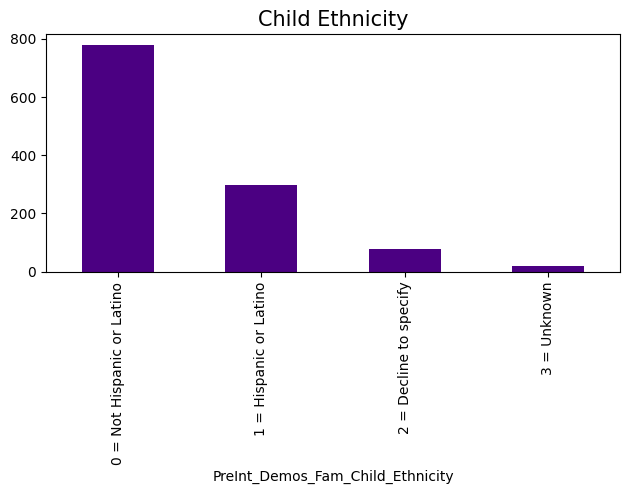

In [11]:
train_cat['PreInt_Demos_Fam_Child_Ethnicity'].value_counts().sort_index().plot(kind='bar', color='indigo')

plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=[
        '0 = Not Hispanic or Latino',
        '1 = Hispanic or Latino',
        '2 = Decline to specify',
        '3 = Unknown'
    ],
    rotation=90
)
plt.tight_layout()
plt.title('Child Ethnicity', fontsize=15)
plt.show();

In [12]:
# NA values
print(f'Total missing values on column: {train_cat['PreInt_Demos_Fam_Child_Ethnicity'].isna().sum()}')

Total missing values on column: 43


#### Race

In [13]:
train_cat['PreInt_Demos_Fam_Child_Race'].value_counts().sort_index()

PreInt_Demos_Fam_Child_Race
0.0     573
1.0     181
2.0     128
3.0      30
4.0      10
7.0       2
8.0     195
9.0      23
10.0     11
11.0      6
Name: count, dtype: int64

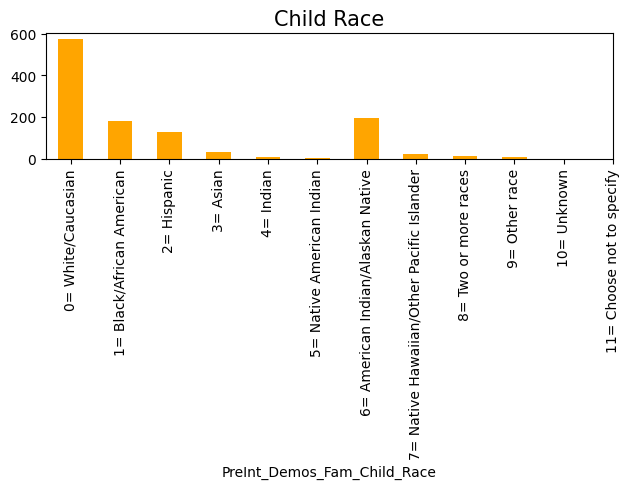

In [14]:
train_cat['PreInt_Demos_Fam_Child_Race'].value_counts().sort_index().plot(kind='bar', color='orange')

plt.xticks(
    ticks = range(12),
    labels =[
        '0= White/Caucasian',
        '1= Black/African American',
        '2= Hispanic',
        '3= Asian',
        '4= Indian',
        '5= Native American Indian',
        '6= American Indian/Alaskan Native',
        '7= Native Hawaiian/Other Pacific Islander',
        '8= Two or more races',
        '9= Other race',
        '10= Unknown',
        '11= Choose not to specify'
    ],
    rotation=90
)
plt.tight_layout()
plt.title('Child Race', fontsize=15)
plt.show();

#### Parent education

In [15]:
p1_edu_freq_table = pd.crosstab(
    index=train_cat['Barratt_Barratt_P1_Edu'],
    columns='count'
)
p1_edu_freq_table['percentage'] = ((p1_edu_freq_table['count'] / p1_edu_freq_table['count'].sum()) * 100).round(2)

p1_edu_freq_table

col_0,count,percentage
Barratt_Barratt_P1_Edu,,
3.0,5,0.42
6.0,15,1.25
9.0,28,2.34
12.0,97,8.10
15.0,162,13.52
18.0,421,35.14
21.0,470,39.23


In [16]:
p2_edu_freq_table = pd.crosstab(
    index=train_cat['Barratt_Barratt_P2_Edu'],
    columns='count'
)
p2_edu_freq_table['percentage'] = ((p2_edu_freq_table['count'] / p2_edu_freq_table['count'].sum()) * 100).round(2)

p2_edu_freq_table

col_0,count,percentage
Barratt_Barratt_P2_Edu,,
3.0,5,0.49
6.0,14,1.38
9.0,44,4.33
12.0,162,15.96
15.0,166,16.35
18.0,301,29.66
21.0,323,31.82


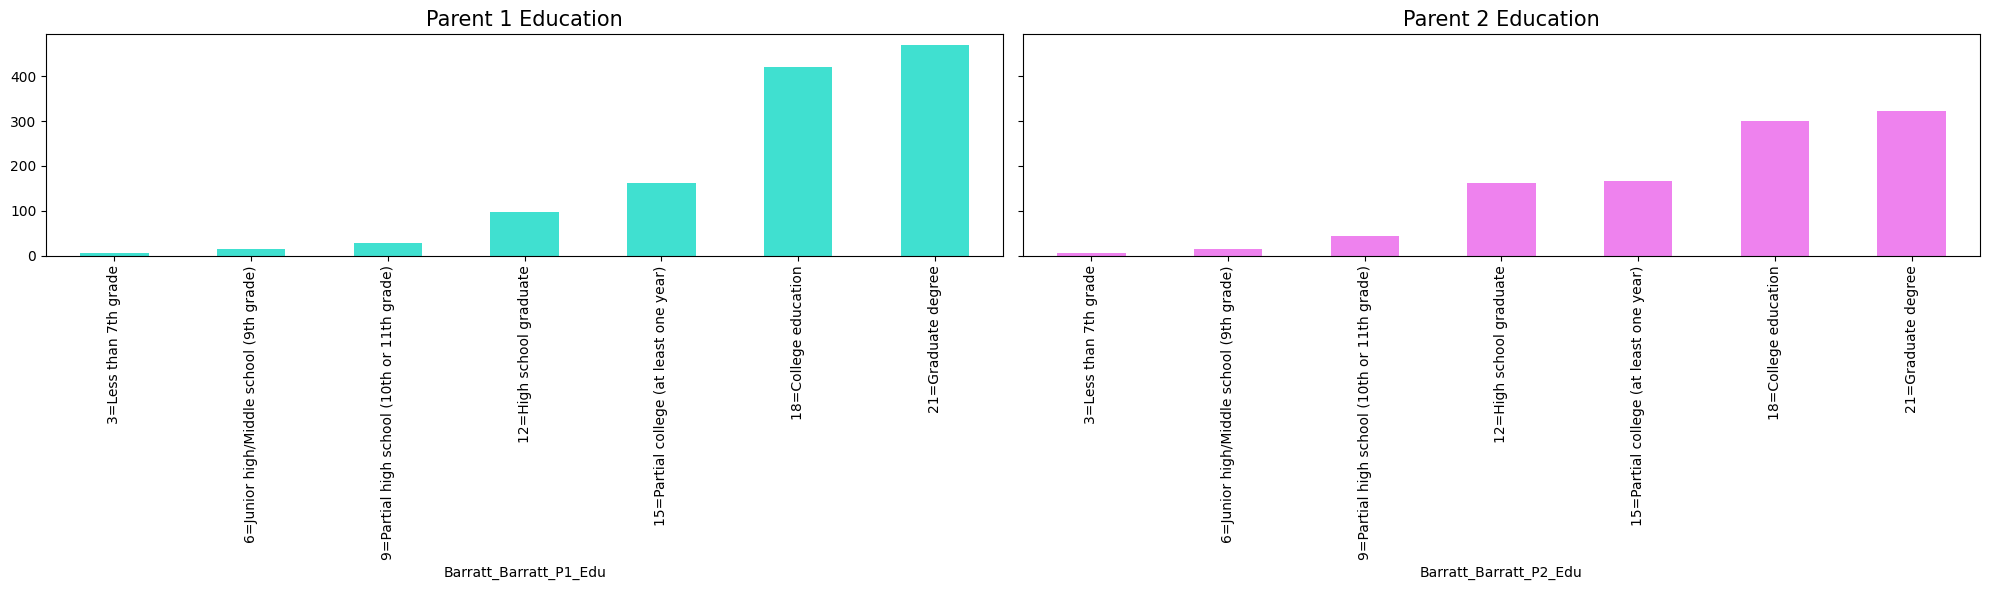

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

edu_order = [3, 6, 9, 12, 15, 18, 21]
edu_labels = [
    '3=Less than 7th grade',
    '6=Junior high/Middle school (9th grade)',
    '9=Partial high school (10th or 11th grade)',
    '12=High school graduate',
    '15=Partial college (at least one year)',
    '18=College education',
    '21=Graduate degree'
]

# Parent 1 Education
train_cat['Barratt_Barratt_P1_Edu'].value_counts().reindex(edu_order).plot(
    kind='bar', color='turquoise', ax=axes[0]
)
axes[0].set_xticks(range(len(edu_order)))
axes[0].set_xticklabels(edu_labels, rotation=90)
axes[0].set_title('Parent 1 Education', fontsize=15)

# Parent 2 Education
train_cat['Barratt_Barratt_P2_Edu'].value_counts().reindex(edu_order).plot(
    kind='bar', color='violet', ax=axes[1]
)
axes[1].set_xticks(range(len(edu_order)))
axes[1].set_xticklabels(edu_labels, rotation=90)
axes[1].set_title('Parent 2 Education', fontsize=15)

plt.tight_layout()
plt.show()

In [18]:
totalp1edu = train_cat['Barratt_Barratt_P1_Edu'].value_counts().sum()
totalp2edu = train_cat['Barratt_Barratt_P2_Edu'].value_counts().sum()
differencePEdu = ((totalp2edu - totalp1edu)/(totalp1edu+totalp2edu) * 100).round(2) 
print(f'The total reponses for parent education level are {totalp1edu} for Parent 1 and {totalp2edu} for Parent 2, a difference of {differencePEdu}% in records')

The total reponses for parent education level are 1198 for Parent 1 and 1015 for Parent 2, a difference of -8.27% in records


#### Parent occupation

In [19]:
p1_occu_freq_table = pd.crosstab(
    index=train_cat['Barratt_Barratt_P1_Occ'],
    columns='count'
)
p1_occu_freq_table['percentage'] = ((p1_occu_freq_table['count'] / p1_occu_freq_table['count'].sum()) * 100).round(2)

p1_occu_freq_table

col_0,count,percentage
Barratt_Barratt_P1_Occ,,
0.0,286,24.20
5.0,31,2.62
10.0,6,0.51
15.0,35,2.96
20.0,31,2.62
25.0,79,6.68
30.0,154,13.03
35.0,219,18.53
40.0,154,13.03


In [20]:
p2_occu_freq_table = pd.crosstab(
    index=train_cat['Barratt_Barratt_P2_Occ'],
    columns='count'
)
p2_occu_freq_table['percentage'] = ((p2_occu_freq_table['count'] / p2_occu_freq_table['count'].sum()) * 100).round(2)

p2_occu_freq_table

col_0,count,percentage
Barratt_Barratt_P2_Occ,,
0.0,65,6.56
5.0,38,3.83
10.0,37,3.73
15.0,86,8.68
20.0,41,4.14
25.0,25,2.52
30.0,149,15.04
35.0,195,19.68
40.0,116,11.71


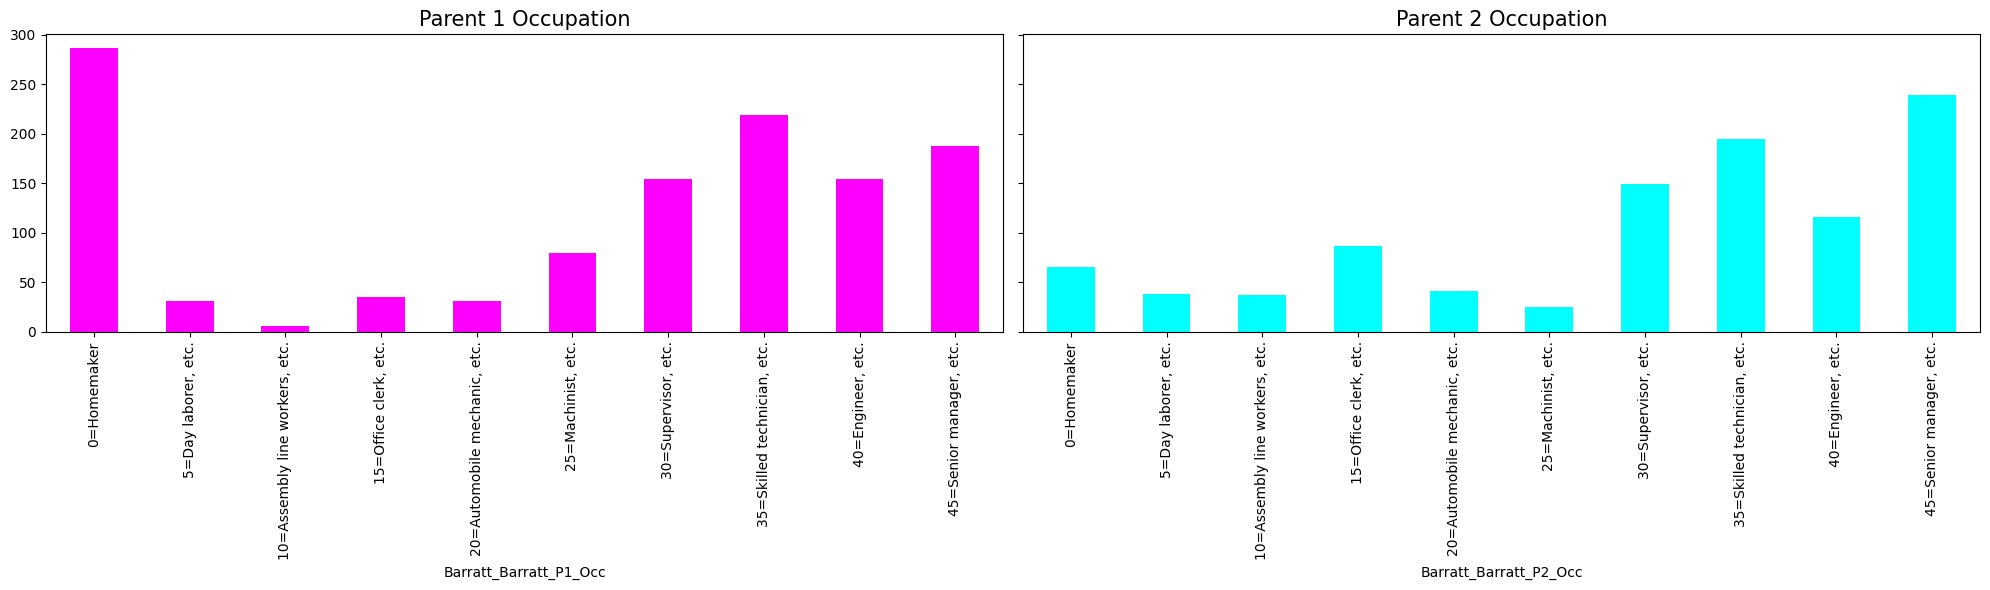

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

occu_order= [0,5,10,15,20,25,30,35,40,45]
occu_labels=[
    '0=Homemaker',
    '5=Day laborer, etc.',
    '10=Assembly line workers, etc.',
    '15=Office clerk, etc.',
    '20=Automobile mechanic, etc.',
    '25=Machinist, etc.',
    '30=Supervisor, etc.',
    '35=Skilled technician, etc.',
    '40=Engineer, etc.',
    '45=Senior manager, etc.'
]


train_cat['Barratt_Barratt_P1_Occ'].value_counts().reindex(occu_order).plot(
    kind='bar', color='magenta', ax=axes[0])
axes[0].set_xticks(range(len(occu_order)))
axes[0].set_xticklabels(occu_labels, rotation=90)
axes[0].set_title('Parent 1 Occupation', fontsize=15)

train_cat['Barratt_Barratt_P2_Occ'].value_counts().reindex(occu_order).plot(
    kind='bar', color='cyan', ax=axes[1])
axes[1].set_xticks(range(len(occu_order)))
axes[1].set_xticklabels(occu_labels, rotation=90)
axes[1].set_title('Parent 2 Occupation', fontsize=15)

plt.tight_layout()
plt.show();

## Quantitative
### Data loading

In [22]:
route3 = r'..\data\TRAIN_NEW\TRAIN_QUANTITATIVE_METADATA_new.xlsx'
train_quant = pd.read_excel(route3)
train_quant

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zwjJWCRzKhDz,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,5.0,13.0,5.0,8.0,7.0,2.0,8.0,11.272986
1209,zwXD5v17Rx01,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,0.0,5.0,0.0,3.0,0.0,0.0,7.0,7.364020
1210,zWzLCi3NTBTd,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,3.0,9.0,3.0,7.0,5.0,2.0,9.0,9.962126
1211,Zy9GTHDxUbXU,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,0.0,8.0,5.0,7.0,2.0,2.0,7.0,NaN


In [23]:
train_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1200 non-null   float64
 2   ColorVision_CV_Score        1190 non-null   float64
 3   APQ_P_APQ_P_CP              1201 non-null   float64
 4   APQ_P_APQ_P_ID              1201 non-null   float64
 5   APQ_P_APQ_P_INV             1201 non-null   float64
 6   APQ_P_APQ_P_OPD             1201 non-null   float64
 7   APQ_P_APQ_P_PM              1201 non-null   float64
 8   APQ_P_APQ_P_PP              1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 12  SDQ_SDQ_Externalizing       1204 non-null   float64
 13  SDQ_SDQ_Generating_Impact   1204 

In [24]:
train_quant.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,853.000000
mean,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,2.074751,12.213455,2.324751,7.613787,4.103821,5.539037,4.599668,2.274917,7.740864,11.245678
std,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,2.022992,6.517330,2.166399,4.130399,2.808079,2.807063,3.510469,2.089041,2.094832,3.234372
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,8.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [25]:
# order participant_id

train_quant.sort_values(by='participant_id', inplace=True)

### EDA
#### Laterality index (score)

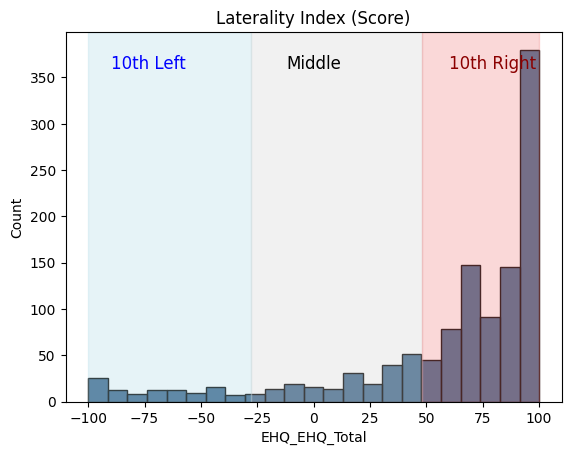

In [26]:
sns.histplot(train_quant['EHQ_EHQ_Total'], color='#003566')

plt.axvspan(-100, -28, color='lightblue', alpha=0.3, label='10th Left')
plt.axvspan(-28, 48, color='lightgrey', alpha=0.3, label='Middle')
plt.axvspan(48, 100, color='lightcoral', alpha=0.3, label='10th Right')

plt.text(-90, plt.ylim()[1]*0.9, '10th Left', color='blue', fontsize=12)
plt.text(0, plt.ylim()[1]*0.9, 'Middle', color='black', fontsize=12, ha='center')
plt.text(60, plt.ylim()[1]*0.9, '10th Right', color='darkred', fontsize=12)

plt.title('Laterality Index (Score)')
plt.show();

Most participants are right-handed

#### Color vision test score

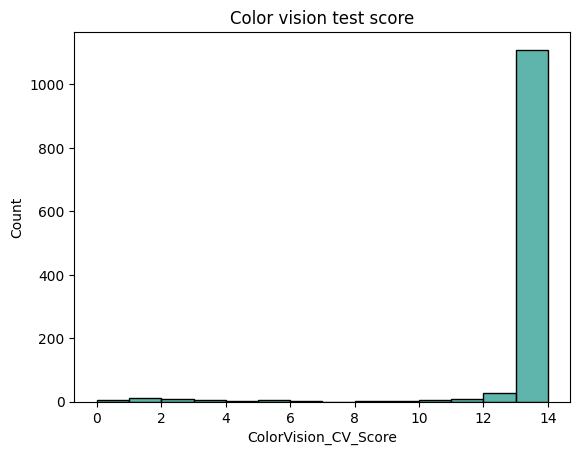

In [27]:
sns.histplot(train_quant['ColorVision_CV_Score'], bins=14, color='#2a9d8f')
plt.title('Color vision test score')
plt.show();

Most participants have normal color vision, according to their scores of more than 12 on the Ishihara color vision test.

#### Alabama Parenting Questionnaire - Parent Report

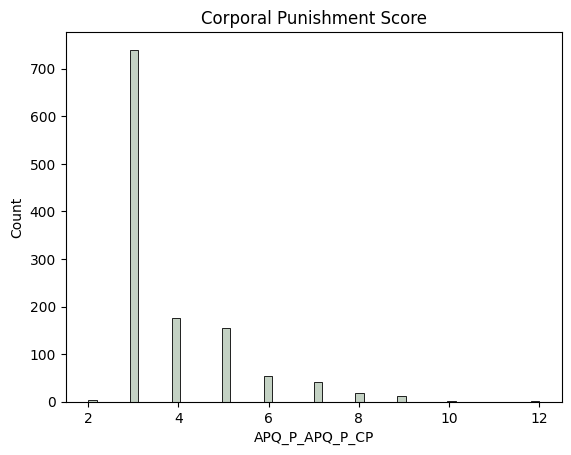

In [28]:
sns.histplot(train_quant['APQ_P_APQ_P_CP'], color='#b0c4b1')
plt.title('Corporal Punishment Score')
plt.show();

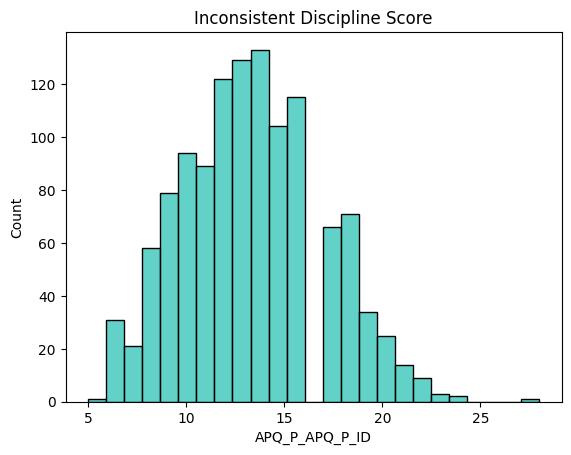

In [29]:
sns.histplot(train_quant['APQ_P_APQ_P_ID'], color='#2ec4b6')
plt.title('Inconsistent Discipline Score')
plt.show();

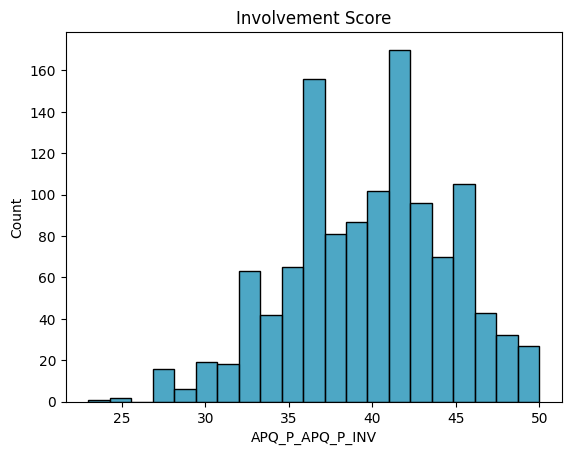

In [30]:
sns.histplot(train_quant['APQ_P_APQ_P_INV'], color='#118ab2')
plt.title('Involvement Score')
plt.show();

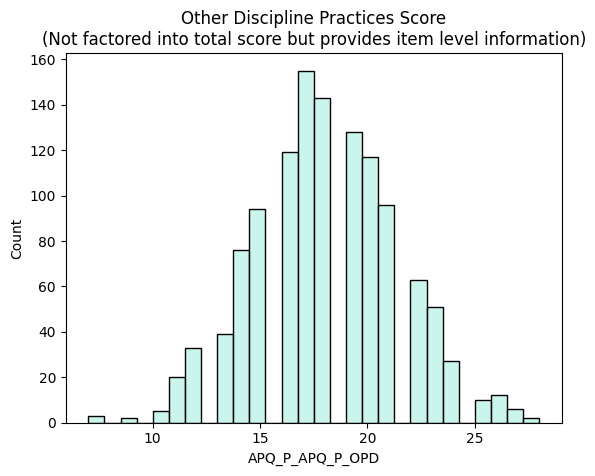

In [31]:
sns.histplot(train_quant['APQ_P_APQ_P_OPD'], color='#b8f2e6')
plt.title('Other Discipline Practices Score\n(Not factored into total score but provides item level information)')
plt.show();

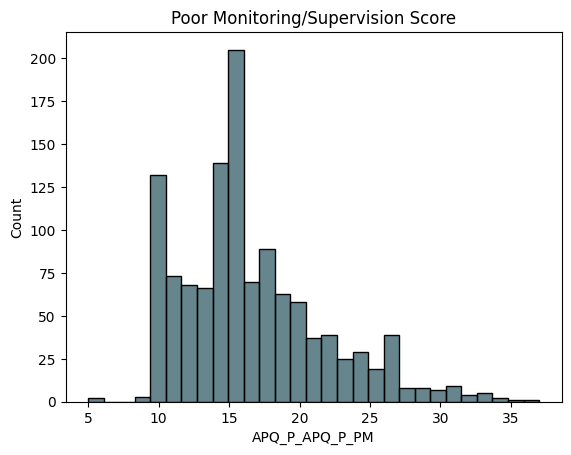

In [32]:
sns.histplot(train_quant['APQ_P_APQ_P_PM'], color='#335c67')
plt.title('Poor Monitoring/Supervision Score')
plt.show();

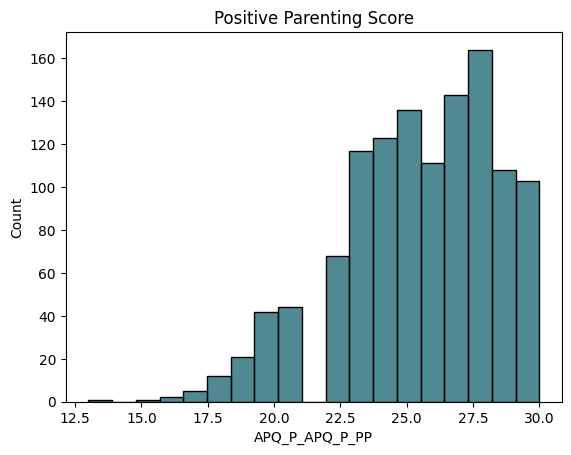

In [33]:
sns.histplot(train_quant['APQ_P_APQ_P_PP'], color='#15616d')
plt.title('Positive Parenting Score')
plt.show();

#### Strenght and difficulties questionnaire

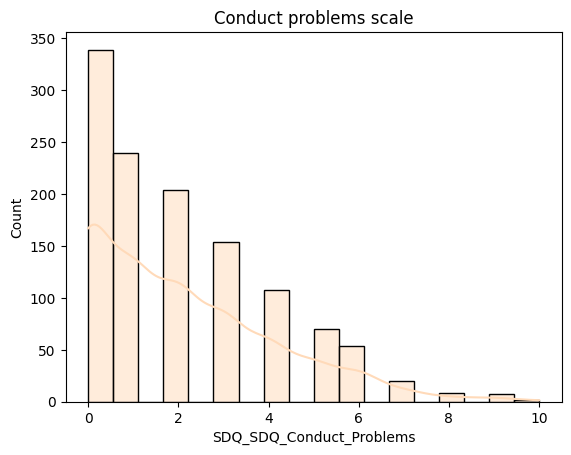

In [34]:
sns.histplot(train_quant['SDQ_SDQ_Conduct_Problems'], kde=True, color='#ffdab9')
plt.title('Conduct problems scale')
plt.show();

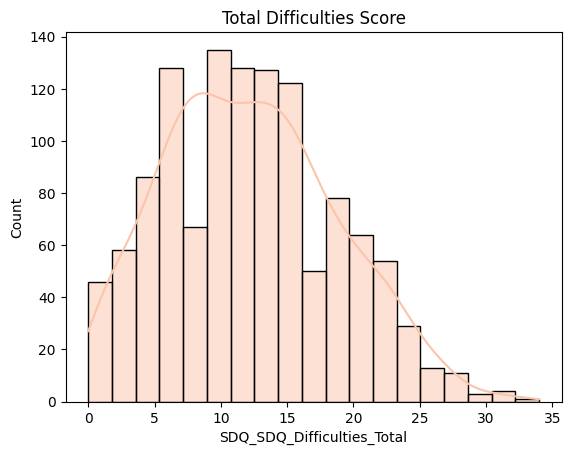

In [35]:
sns.histplot(train_quant['SDQ_SDQ_Difficulties_Total'], kde=True, color='#fbc4ab')
plt.title('Total Difficulties Score')
plt.show();

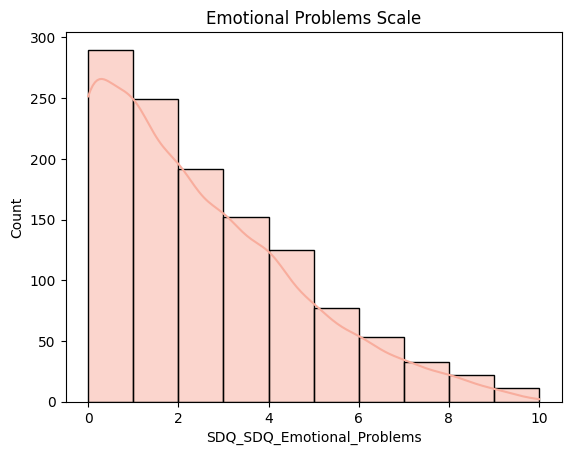

In [36]:
sns.histplot(train_quant['SDQ_SDQ_Emotional_Problems'], bins=10, kde=True, color='#f8ad9d')
plt.title('Emotional Problems Scale')
plt.show();

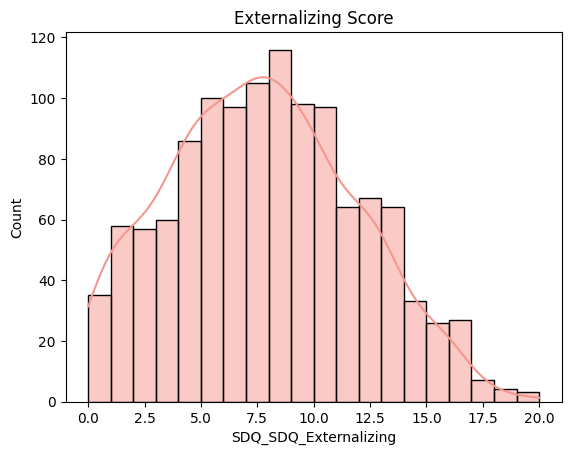

In [37]:
sns.histplot(train_quant['SDQ_SDQ_Externalizing'], bins=20, kde=True, color='#f4978e')
plt.title('Externalizing Score')
plt.show();

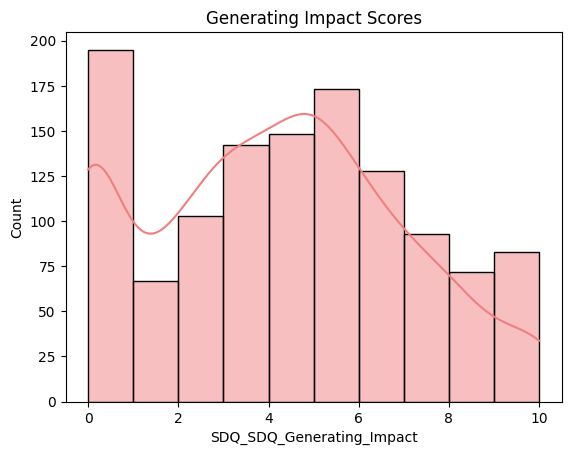

In [38]:
sns.histplot(train_quant['SDQ_SDQ_Generating_Impact'], bins=10, kde=True, color='#f08080')
plt.title('Generating Impact Scores')
plt.show();

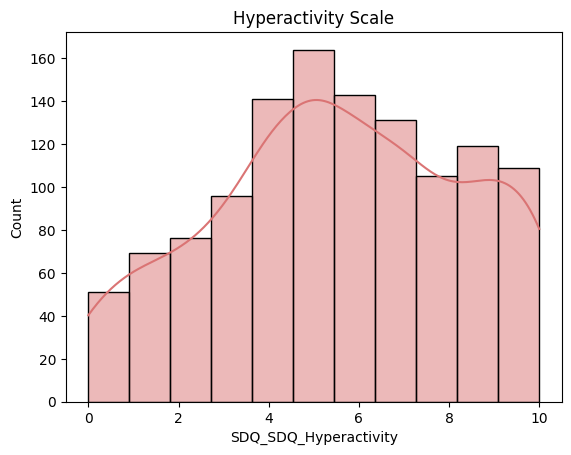

In [39]:
sns.histplot(train_quant['SDQ_SDQ_Hyperactivity'], bins=11, kde=True, color='#DA7474')
plt.title('Hyperactivity Scale')
plt.show();

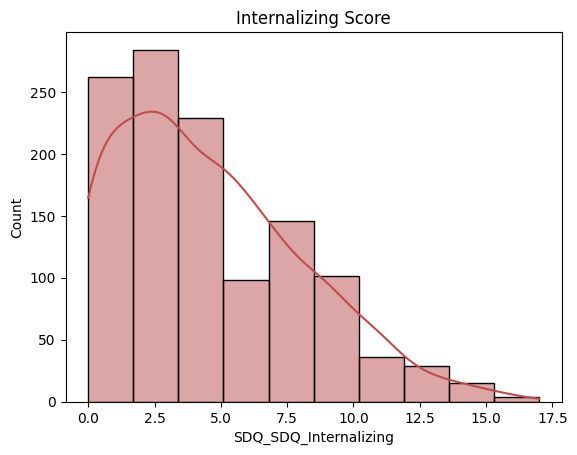

In [40]:
sns.histplot(train_quant['SDQ_SDQ_Internalizing'], bins=10, kde=True, color='#BC4E4E')
plt.title('Internalizing Score')
plt.show();

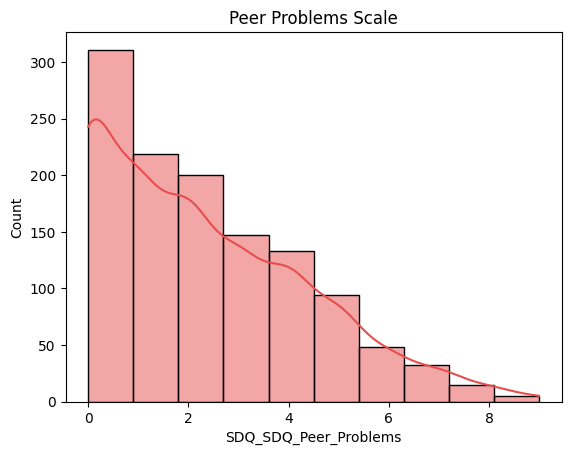

In [41]:
sns.histplot(train_quant['SDQ_SDQ_Peer_Problems'], bins=10, kde=True, color='#E74E4E')
plt.title('Peer Problems Scale')
plt.show();

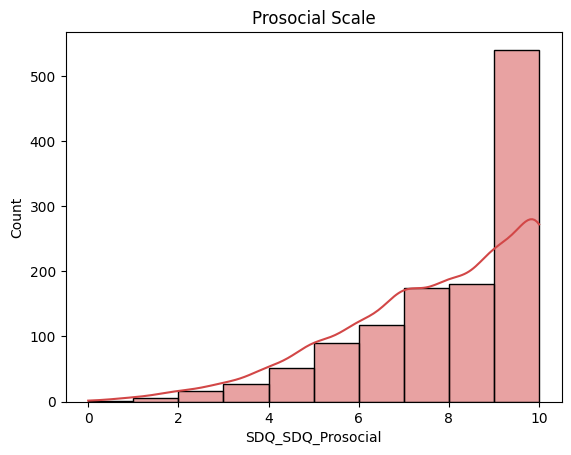

In [42]:
sns.histplot(train_quant['SDQ_SDQ_Prosocial'], bins=10, kde=True, color='#D24747')
plt.title('Prosocial Scale')
plt.show();

#### Age at time of MRI scan

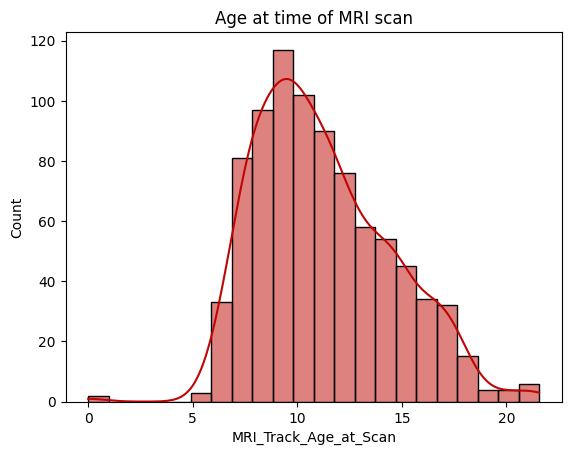

In [43]:
sns.histplot(train_quant['MRI_Track_Age_at_Scan'], kde=True, color='#bf0603')
plt.title('Age at time of MRI scan')
plt.show();

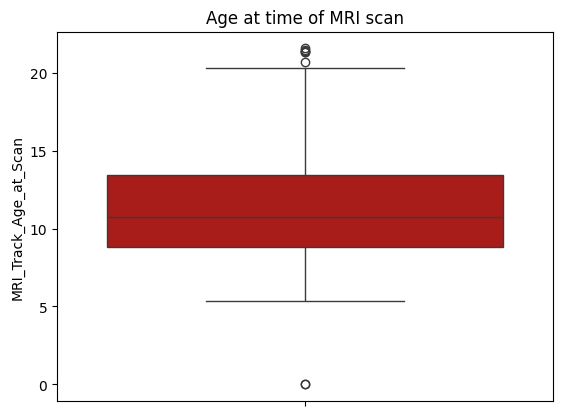

In [44]:
sns.boxplot(train_quant['MRI_Track_Age_at_Scan'], color='#bf0603')
plt.title('Age at time of MRI scan')
plt.show();

## Solutions
### Data loading

In [45]:
route4 = r'..\data\TRAIN_NEW\TRAINING_SOLUTIONS.xlsx'
train_solutions = pd.read_excel(route4)
train_solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [46]:
train_solutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [47]:
# order participant_id

train_solutions.sort_values(by='participant_id', inplace=True)

### EDA
#### ADHD Outcome

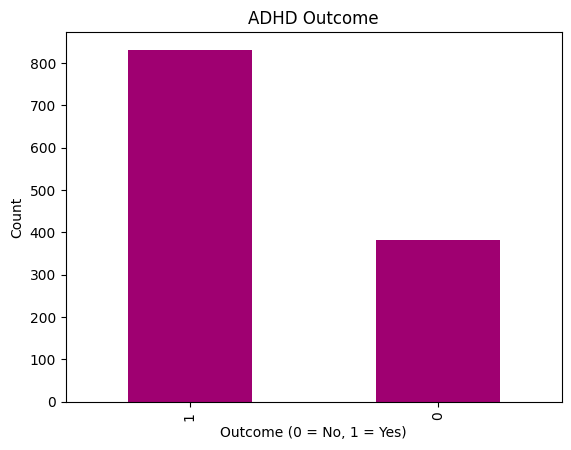

In [48]:
train_solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='#9f0071')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [49]:
total = train_solutions['ADHD_Outcome'].count()
yes_adhd = train_solutions['ADHD_Outcome'].value_counts().loc[1]
no_adhd = train_solutions['ADHD_Outcome'].value_counts().loc[0]
yes_adhd_percent = (yes_adhd / total).round(2) * 100
no_adhd_percent = (no_adhd / total).round(2) * 100

print(f'Total values of ADHD Outcome:\n{yes_adhd} participants with ADHD ({yes_adhd_percent}%)\n{no_adhd} participants with NO ADHD ({no_adhd_percent}%)')

Total values of ADHD Outcome:
831 participants with ADHD (69.0%)
382 participants with NO ADHD (31.0%)


#### Gender distribution

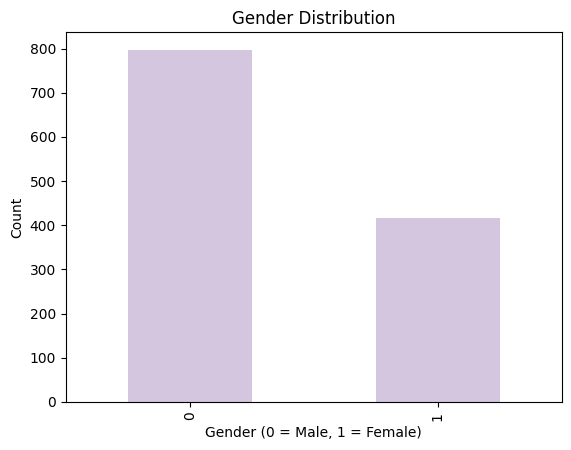

In [50]:
train_solutions['Sex_F'].value_counts().plot(kind='bar', color='#d5c6e0')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

In [51]:
total = train_solutions['Sex_F'].count()
yes_female = train_solutions['Sex_F'].value_counts().loc[1]
no_female = train_solutions['Sex_F'].value_counts().loc[0]
yes_female_percent = (yes_female / total).round(2) * 100
no_female_percent = (no_female / total).round(2) * 100

print(f'Female participants: {yes_female} ({yes_female_percent}%)\nMale participants: {no_female} ({no_female_percent}%)')

Female participants: 416 (34.0%)
Male participants: 797 (66.0%)


## Correlations

In [52]:
# check if participant_id is aligned
(train_quant['participant_id'].values == train_solutions['participant_id'].values).all()

np.True_

In [53]:
(train_cat['participant_id'].values == train_solutions['participant_id'].values).all()

np.True_

In [54]:
(train_FCM['participant_id'].values == train_solutions['participant_id'].values).all()

np.True_

### Emotional problems vs ADHD Outcome

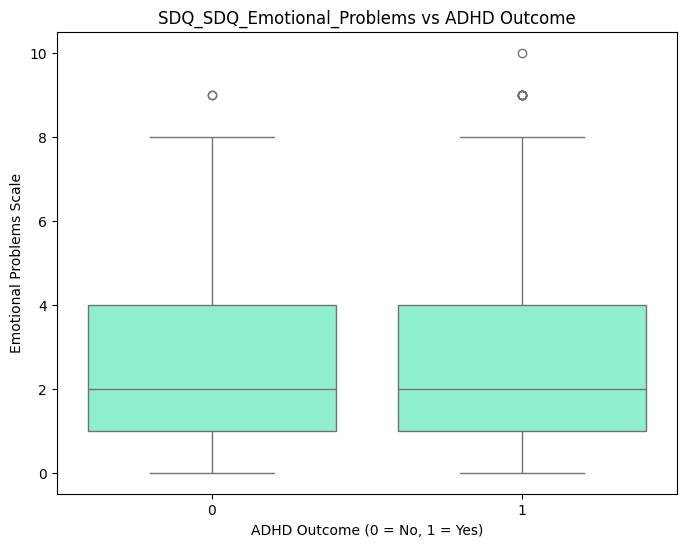

In [55]:
train_quant_copy = train_quant.copy()
train_quant_copy['ADHD_Outcome'] = train_solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_quant_copy, color='aquamarine')
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome (0 = No, 1 = Yes)')
plt.ylabel('Emotional Problems Scale')
plt.show()

!!! There seems to be no notable difference between the patients with ADHD and without it, but in the tutorials there was a difference. Is this because of the __new__ training data?

### Verification - Correlation with old dataset

In [56]:
train_quant_old = pd.read_excel(r'..\data\TRAIN_OLD\TRAIN_QUANTITATIVE_METADATA.xlsx')
train_quant_old

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,87.80,14,5,14,39,20,15,21,1,9,2,7,3,6,2,0,9,10.697923
1209,groSbUfkQngM,77.80,14,3,10,32,20,11,23,6,18,3,11,9,5,7,4,7,13.964750
1210,zmxGvIrOD0bt,16.68,14,3,16,28,15,19,27,3,4,1,3,0,0,1,0,10,NaN
1211,rOmWFuJCud5G,53.40,14,3,14,34,18,23,23,4,9,0,9,3,5,0,0,9,12.089094


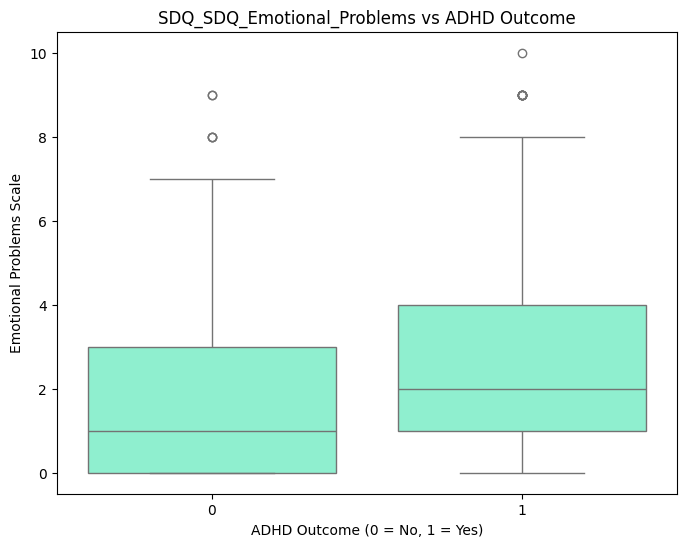

In [57]:
train_quant_old_copy = train_quant_old.copy()
train_quant_old_copy['ADHD_Outcome'] = train_solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_quant_old_copy, color='aquamarine')
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome (0 = No, 1 = Yes)')
plt.ylabel('Emotional Problems Scale')
plt.show()

It's confirmed that the difference on the outcome correlation corresponds to the __old__ dataset

### Hyperactivity vs ADHD Outcome

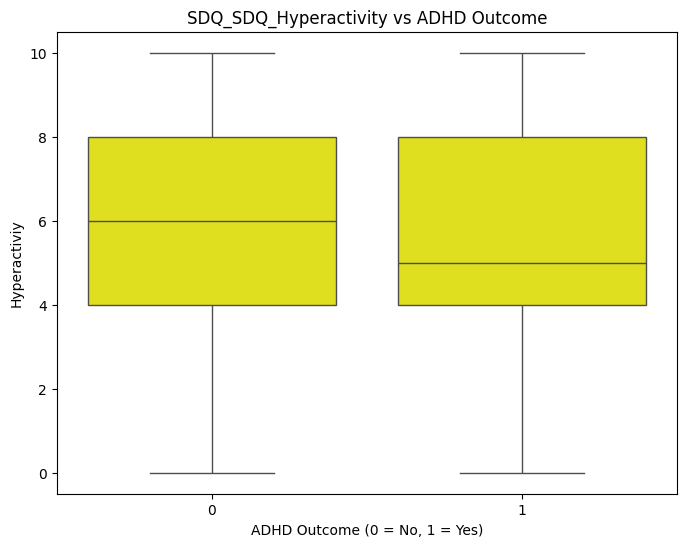

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Hyperactivity', data=train_quant_copy, color='yellow')
plt.title('SDQ_SDQ_Hyperactivity vs ADHD Outcome')
plt.xlabel('ADHD Outcome (0 = No, 1 = Yes)')
plt.ylabel('Hyperactiviy')
plt.show()

The median hyperactivity score is a bit lower in participants WITH ADHD.

## One-hot encoding
Using one-hot encoding to avoid implying ordinal relationships and improving algorithm performance.<br>
It creates a new binary column for each unique category within a variable. Each contain boolean values.

In [59]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 104.2+ KB


In [60]:
for col in train_cat.select_dtypes(include=['int','float']).columns:
    train_cat[col] = train_cat[col].astype('category')

The participant_id column (the first one) needs to be excluded from the encoding

In [61]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [75]:
# encoding categorical data
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
# The drop_first=True parameter avoids the "dummy variable trap" by dropping the first category for each feature, reducing redundancy in the encoded data.

train_encoded = train_encoded.apply(lambda col: col.round().astype('Int64'))
# since applymap is deprecated --> this converts all outputs to clean 0/1 integers and preserves NaNs safely

train_encoded.isna().sum().sum()

np.int64(0)

In [63]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

cat_train_final.head()

,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1.0,...,Barratt_Barratt_P2_Edu_21.0,Barratt_Barratt_P2_Occ_5.0,Barratt_Barratt_P2_Occ_10.0,Barratt_Barratt_P2_Occ_15.0,Barratt_Barratt_P2_Occ_20.0,Barratt_Barratt_P2_Occ_25.0,Barratt_Barratt_P2_Occ_30.0,Barratt_Barratt_P2_Occ_35.0,Barratt_Barratt_P2_Occ_40.0,Barratt_Barratt_P2_Occ_45.0
0,00aIpNTbG5uh,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,00fV0OyyoLfw,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,04X1eiS79T4B,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,05ocQutkURd6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06YUNBA9ZRLq,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
cat_train_final.columns.tolist()

['participant_id',
 'Basic_Demos_Enroll_Year_2016',
 'Basic_Demos_Enroll_Year_2017',
 'Basic_Demos_Enroll_Year_2018',
 'Basic_Demos_Enroll_Year_2019',
 'Basic_Demos_Enroll_Year_2020',
 'Basic_Demos_Study_Site_2',
 'Basic_Demos_Study_Site_3',
 'Basic_Demos_Study_Site_4',
 'PreInt_Demos_Fam_Child_Ethnicity_1.0',
 'PreInt_Demos_Fam_Child_Ethnicity_2.0',
 'PreInt_Demos_Fam_Child_Ethnicity_3.0',
 'PreInt_Demos_Fam_Child_Race_1.0',
 'PreInt_Demos_Fam_Child_Race_2.0',
 'PreInt_Demos_Fam_Child_Race_3.0',
 'PreInt_Demos_Fam_Child_Race_4.0',
 'PreInt_Demos_Fam_Child_Race_7.0',
 'PreInt_Demos_Fam_Child_Race_8.0',
 'PreInt_Demos_Fam_Child_Race_9.0',
 'PreInt_Demos_Fam_Child_Race_10.0',
 'PreInt_Demos_Fam_Child_Race_11.0',
 'MRI_Track_Scan_Location_2.0',
 'MRI_Track_Scan_Location_3.0',
 'MRI_Track_Scan_Location_4.0',
 'Barratt_Barratt_P1_Edu_6.0',
 'Barratt_Barratt_P1_Edu_9.0',
 'Barratt_Barratt_P1_Edu_12.0',
 'Barratt_Barratt_P1_Edu_15.0',
 'Barratt_Barratt_P1_Edu_18.0',
 'Barratt_Barratt_P1_Edu_2

# Test Dataframes
Same encoding steps applied to the categorical testing data 

In [65]:
route5 = r"..\data\TEST\TEST_CATEGORICAL.xlsx"
test_cat = pd.read_excel(route5)
test_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [66]:
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


In [67]:
# convert our int variables to categories
for col in test_cat.select_dtypes(include=['int', 'float']).columns:
    test_cat[col] = test_cat[col].astype('category')

# Encode categorical variables in test
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)

test_encoded = test_encoded.apply(lambda col: col.round().astype('Int64'))
# since applymap is deprecated --> this converts all outputs to clean 0/1 integers and preserves NaNs safely

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)

cat_test_final.head()

,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1.0,...,Barratt_Barratt_P2_Edu_21.0,Barratt_Barratt_P2_Occ_5.0,Barratt_Barratt_P2_Occ_10.0,Barratt_Barratt_P2_Occ_15.0,Barratt_Barratt_P2_Occ_20.0,Barratt_Barratt_P2_Occ_25.0,Barratt_Barratt_P2_Occ_30.0,Barratt_Barratt_P2_Occ_35.0,Barratt_Barratt_P2_Occ_40.0,Barratt_Barratt_P2_Occ_45.0
0,Cfwaf5FX7jWK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,vhGrzmvA3Hjq,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,ULliyEXjy4OV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,LZfeAb1xMtql,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,EnFOUv0YK1RG,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# Merging dataframes
## Train DF

In [68]:
train_cat_FCM = pd.merge(cat_train_final, train_FCM, on = 'participant_id')

In [69]:
train_df = pd.merge(train_cat_FCM, train_quant, on = 'participant_id')

train_df.head()

,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1.0,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,0,0,0,1,0,0,0,1,1,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0,1,0,0,0,0,0,0,0,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,0,1,0,0,0,0,0,0,1,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,0,0,1,0,0,0,0,0,0,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0,0,1,0,0,0,0,0,0,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


The solutions dataframe is not merged, as this is the X_train dataframe containing the feature variables. The testing data doesn't contain the solutions either.

## Test DF

In [70]:
test_FCM = pd.read_csv(r"..\data\TEST\TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")

test_quant = pd.read_excel(r"..\data\TEST\TEST_QUANTITATIVE_METADATA.xlsx")

test_cat_FCM = pd.merge(cat_test_final, test_FCM, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_quant, on = 'participant_id')


test_df.head()

,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1.0,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0,0,0,0,0,0,0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0,0,0,0,0,0,0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0,0,0,0,0,0,0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0,0,0,0,0,0,0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,0,0,0,0,0,0,0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


# NA values

In [71]:
print(f'Total count of missin values: {train_df.isna().sum().sum()}')

Total count of missin values: 549


In [72]:
missing_values = train_df.isna().sum()
missing_values = missing_values[missing_values > 0]

missing_values

EHQ_EHQ_Total                  13
ColorVision_CV_Score           23
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Conduct_Problems        9
SDQ_SDQ_Difficulties_Total      9
SDQ_SDQ_Emotional_Problems      9
SDQ_SDQ_Externalizing           9
SDQ_SDQ_Generating_Impact       9
SDQ_SDQ_Hyperactivity           9
SDQ_SDQ_Internalizing           9
SDQ_SDQ_Peer_Problems           9
SDQ_SDQ_Prosocial               9
MRI_Track_Age_at_Scan         360
dtype: int64

⚠️ In one-hot ecoding __missing values were replaced by 0__ - check a different approach

#### Age at MRI scan - replace missing values

In [80]:
train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)

missing_values = train_df.isna().sum()
missing_values = missing_values[missing_values > 0]

missing_values

EHQ_EHQ_Total                 13
ColorVision_CV_Score          23
APQ_P_APQ_P_CP                12
APQ_P_APQ_P_ID                12
APQ_P_APQ_P_INV               12
APQ_P_APQ_P_OPD               12
APQ_P_APQ_P_PM                12
APQ_P_APQ_P_PP                12
SDQ_SDQ_Conduct_Problems       9
SDQ_SDQ_Difficulties_Total     9
SDQ_SDQ_Emotional_Problems     9
SDQ_SDQ_Externalizing          9
SDQ_SDQ_Generating_Impact      9
SDQ_SDQ_Hyperactivity          9
SDQ_SDQ_Internalizing          9
SDQ_SDQ_Peer_Problems          9
SDQ_SDQ_Prosocial              9
dtype: int64

#### Using backward and foward fills

In [81]:
train_df.ffill(inplace=True)
print(train_df.isna().sum().sum())

0


### Fill NAs in TEST df

In [82]:
for col in test_df.columns:
    if test_df[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_df[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_df[col] = test_df[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

⚠️ Check NAs<br>
⚠️ Frequency tables<br>
⚠️ Outliers<br>

# ML

Using a multi-outcome model to predict both gender and ADHD diagnosis